# **Analysis on Shopify Data**

In [1]:
#Importing essential libraries
import numpy as np
import pandas as pd

In [2]:
#importing dataset
shopify_data = pd.read_excel('shopifydata.xlsx')

In [3]:
shopify_data.head(10)

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-30 23:55:35
1,2,92,925,90,1,cash,2017-03-30 23:41:34
2,3,44,861,144,1,cash,2017-03-30 23:26:54
3,4,18,935,156,1,credit_card,2017-03-30 23:16:10
4,5,18,883,156,1,credit_card,2017-03-30 23:12:13
5,6,58,882,138,1,credit_card,2017-03-30 22:34:47
6,7,87,915,149,1,cash,2017-03-30 22:04:13
7,8,22,761,292,2,cash,2017-03-30 21:49:13
8,9,64,914,266,2,debit,2017-03-30 21:31:54
9,10,52,788,146,1,credit_card,2017-03-30 21:31:11


In [4]:
shopify_data.dtypes

order_id                   int64
shop_id                    int64
user_id                    int64
order_amount               int64
total_items                int64
payment_method            object
created_at        datetime64[ns]
dtype: object

In [5]:
#identifying null values
print(shopify_data.isnull().sum())

order_id          0
shop_id           0
user_id           0
order_amount      0
total_items       0
payment_method    0
created_at        0
dtype: int64


In [6]:
# user defined integrated group by function for preliminary analysis
def usergroupby(firstvar,secondvar,method):
  var = shopify_data[[firstvar,secondvar]]
  if method == 'sum':
    return var.groupby(secondvar).sum().reset_index()
  elif method == 'count':
    return var.groupby(secondvar).count().reset_index()
  elif method == 'mean':
    return var.groupby(secondvar).mean().reset_index()
  else:
    print("method invalid")
# user defined function for checking maximums
def max_min(type_of,data,count,var):
  if type_of=='max':
    return data.nlargest(count,var)
  else:
    return data.nsmallest(count,var)

In [7]:
''' 1st Metric '''
# Calculating total order amount as per debit, cash and credit card - to show the in-hand money vs later credit
payment = usergroupby('order_amount','payment_method','sum')
print(payment)

  payment_method  order_amount
0           cash       1164183
1    credit_card      12945867
2          debit       1615590


Text(0, 0.5, 'Order Amount Paid')

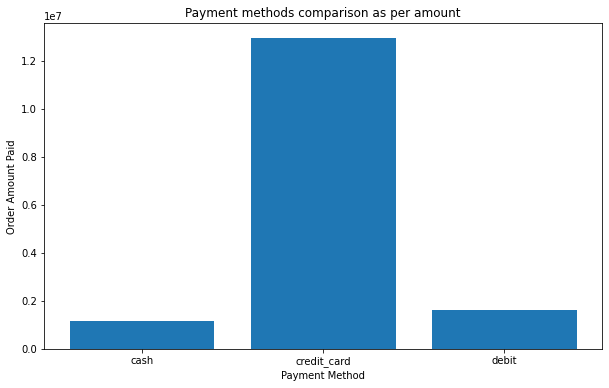

In [8]:
#visualizing metric 1
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.bar(payment['payment_method'],payment['order_amount'])
plt.title("Payment methods comparison as per amount")
plt.xlabel("Payment Method")
plt.ylabel("Order Amount Paid")

In [9]:
''' 2nd Metric '''
# Calculating total order amount as per different stores
orderamount_per_shop = usergroupby('order_amount','shop_id','sum')
print(orderamount_per_shop)
#check top earning stores
top3_shop_earning = max_min('max',orderamount_per_shop,3,'order_amount')
print("Top earning stores:\n",top3_shop_earning)

    shop_id  order_amount
0         1         13588
1         2          9588
2         3         14652
3         4         13184
4         5         13064
..      ...           ...
95       96         16830
96       97         15552
97       98         14231
98       99         18330
99      100          8547

[100 rows x 2 columns]
Top earning stores:
     shop_id  order_amount
41       42      11990176
77       78       2263800
88       89         23128


In [10]:
''' 3rd Metric '''
# Calculating percentage of total sneakers sold per store
'''
  first - total sneakers sold per store
  second - total sneakers sold in all stores
  percentage = first/second*100 
'''

first = usergroupby('order_id','shop_id','count')
print('Total sneakers sold per store:\n ',first)
second = shopify_data[['order_id']].count()
print('Total sneakers sold in all stores: \n',second)
percentage = (first/second)*100
print('Percentage of sneakers sold as per different stores: \n',percentage['order_id'])

Total sneakers sold per store:
      shop_id  order_id
0         1        44
1         2        55
2         3        48
3         4        51
4         5        45
..      ...       ...
95       96        51
96       97        48
97       98        58
98       99        54
99      100        40

[100 rows x 2 columns]
Total sneakers sold in all stores: 
 order_id    5000
dtype: int64
Percentage of sneakers sold as per different stores: 
 0     0.88
1     1.10
2     0.96
3     1.02
4     0.90
      ... 
95    1.02
96    0.96
97    1.16
98    1.08
99    0.80
Name: order_id, Length: 100, dtype: float64


Text(0, 0.5, 'Count of percentages')

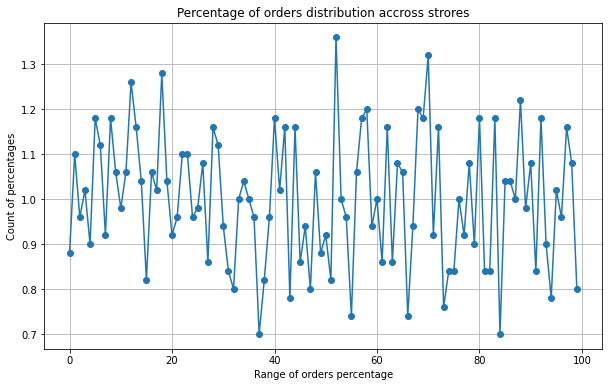

In [11]:
#visualizing metric 3
plt.figure(figsize=(10, 6))
plt.plot(percentage['order_id'], marker = 'o')
plt.grid()
plt.title("Percentage of orders distribution accross strores")
plt.xlabel("Range of orders percentage")
plt.ylabel("Count of percentages")

In [12]:
''' 4th Metric '''
#Calculating top 3 and bottom 3 stores w.r.t order quantity
maximums = max_min('max',first,3,'order_id')
print('Top 3 stores with maximum orders \n', maximums)
minimums = max_min('min',first,3,'order_id')
print('Bottom 3 stores with minimum orders \n',minimums)

Top 3 stores with maximum orders 
     shop_id  order_id
52       53        68
70       71        66
18       19        64
Bottom 3 stores with minimum orders 
     shop_id  order_id
37       38        35
84       85        35
55       56        37


Text(0, 0.5, 'Order quantity')

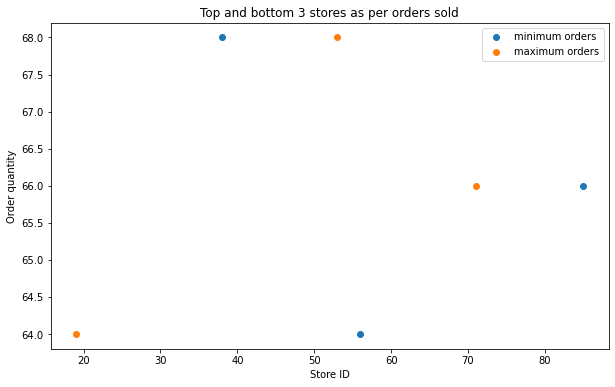

In [13]:
#visualizing metric 4
plt.figure(figsize=(10, 6))
plt.scatter(minimums['shop_id'],maximums['order_id'])
plt.scatter(maximums['shop_id'],maximums['order_id'])
plt.legend(['minimum orders', 'maximum orders'])
plt.title("Top and bottom 3 stores as per orders sold")
plt.xlabel("Store ID")
plt.ylabel("Order quantity")

In [14]:
''' 5th Metric '''
# We can perform analysis based on daily and weekly and hourly order value (as there is only 1 month data)
#converting created_at(string column) to datetime
shopify_data['created_at'] =  pd.to_datetime(shopify_data['created_at'], format='%Y-%m-%d') 

In [15]:
#user defined function to calculate total order amount based on different timelines
def resample_size(size):
  if size == 'W':
    text = 'Weekly'
  elif size == 'd':
    text = 'Daily'
  elif size == 'h':
    text = 'Hourly'
  else:
    print('Wrong parameter for time mentioned')
  Timeline = shopify_data[['created_at','order_amount']]
  print(text,'order amount from all stores: \n')
  return Timeline.resample(size, on='created_at').order_amount.sum().reset_index()
  

In [16]:
Weekly = resample_size('W')
print(Weekly)

Weekly order amount from all stores: 

  created_at  order_amount
0 2017-03-05       2772666
1 2017-03-12       2954100
2 2017-03-19       3148098
3 2017-03-26       4303924
4 2017-04-02       2546852


In [17]:
Daily = resample_size('d')

Daily order amount from all stores: 



In [18]:
Hourly = resample_size('h')

Hourly order amount from all stores: 



Text(0, 0.5, 'Total Order Amount')

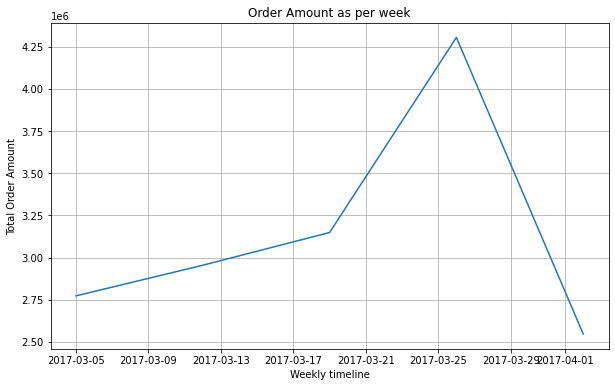

In [19]:
#Visualizing metric 5

plt.figure(figsize=(10, 6))
plt.plot(Weekly['created_at'].tolist(),Weekly['order_amount'].tolist())
plt.grid()
plt.title("Order Amount as per week")
plt.xlabel("Weekly timeline")
plt.ylabel("Total Order Amount")


Text(0, 0.5, 'Total Order Amount')

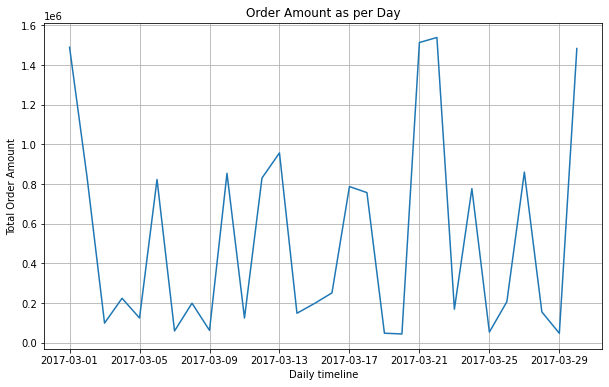

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(Daily['created_at'].tolist(),Daily['order_amount'].tolist());
plt.grid()
plt.title("Order Amount as per Day")
plt.xlabel("Daily timeline")
plt.ylabel("Total Order Amount")
